In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.ion()

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster
import sys
import numpy as np
import csv

path_to_mitie_lib = '/opt/anaconda/anaconda3/lib/python3.6/site-packages/mitie'
path_to_ner_model = '/home/somnus/MITIE-master/MITIE-models/english/ner_model.dat'

sys.path.append(path_to_mitie_lib)

from mitie import *

In [3]:
from itertools import cycle, islice

In [4]:
# total number of articles to process
N = 50

# in memory stores for the topics, titles and contents of the news stories
# topics_array = []
titles_array = []
corpus = []

In [7]:
for i in range(0, N):

    # get the contents of the article
    # art = '/home/somnus/data_sets/articles/article-' + str(i) + '.txt'
    x = str(i)
    with open('/home/somnus/data_sets/articles_1/article-' + x + '.txt', 'r') as myfile:
        d1 = myfile.read().replace('\n', '')

        d1 = d1.lower()
        corpus.append(d1)

    # get the title of the article
    # titl = '/home/somnus/data_sets/articles/title-' + str(i) + '.txt'
    with open('/home/somnus/data_sets/articles_1/title-' + x + '.txt', 'r') as myfile:
        ti1 = myfile.read().replace('\n', '')
        ti1 = ti1.lower()
        titles_array.append(ti1)

    # get the original topic of the article
    # top = '/home/somnus/data_sets/articles/topic-' + str(i) + '.txt'
    '''with open('topic-' + str(i) + '.txt', 'r') as myfile:
        to1 = myfile.read().replace('\n', '')
        to1 = to1.lower()
        topics_array.append(to1)
        '''

In [8]:
# entity subset array
entity_text_array = []

ner = named_entity_extractor(path_to_ner_model)

for i in range(0, N):

    # Load the article contents text file and convert it into a list of words.
    tokens = tokenize(load_entire_file('/home/somnus/data_sets/articles_1/article-' + str(i) + '.txt'))

    # extract all entities known to the ner model mentioned in this article
    entities = ner.extract_entities(tokens)

    # extract the actual entity words and append to the array
    for e in entities:
        range_array = e[0]
        tag = e[1]
        score = e[2]
        score_text = "{:0.3f}".format(score)
        # entity_text = " ".join(tokens[j] for j in range_array)
        entity_text = " ".join(tokens[i].decode() for i in range_array)
        entity_text_array.append(entity_text.lower())

# remove duplicate entities detected
entity_text_array = np.unique(entity_text_array)

In [9]:
vect = TfidfVectorizer(sublinear_tf=True,
                       max_df=0.5,
                       analyzer='word',
                       stop_words='english',
                       vocabulary=entity_text_array)

corpus_tf_idf = vect.fit_transform(corpus)

In [10]:
# change n_clusters to equal the number of clusters desired
n_clusters = 5
# n_components = n_clusters

# spectral clustering
spectral = cluster.SpectralClustering(n_clusters=n_clusters,
                                      eigen_solver='arpack',
                                      affinity="nearest_neighbors",
                                      n_neighbors=10)

spectral.fit(corpus_tf_idf)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver='arpack', eigen_tol=0.0,
          gamma=1.0, kernel_params=None, n_clusters=5, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=None)

In [11]:
# OUTPUT
# article_number, topic, spectral_clustering_cluster_number, article_title
cluster_assignments = np.int()


if hasattr(spectral, 'labels_'):
    cluster_assignments = spectral.labels_.astype(np.int)

print("S.no", "Cluster Number", "Title of Article")

data = list()

for i in range(0, len(cluster_assignments)):

    data.append([int(i), int(cluster_assignments[i]), str(titles_array[i])])
    # print(i, topics_array[i], cluster_assignments[i], titles_array[i])
    # print(data[-1])

S.no Cluster Number Title of Article


Text(0.5,1,'Spectral Clustering')

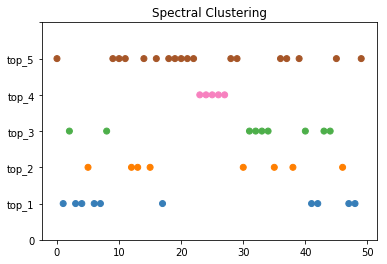

In [12]:
x = [data[i][0] for i in range(0, 50)]
y = [data[j][1] for j in range(0, 50)]
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                    '#f781bf', '#a65628', '#984ea3',
                                    '#999999', '#e41a1c', '#dede00']),
                                    int(max(cluster_assignments) + 1))))
fig, ax = plt.subplots()
ax.scatter(x, y, color=colors[cluster_assignments])
ax.set_ylim(-1, 5)
ax.set_yticklabels(['0', 'top_1', 'top_2',
               'top_3', 'top_4',
               'top_5'])
ax.set_title("Spectral Clustering")